## Programming exercises

### 9.1 The receiver operating characteristic (ROC)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,auc

In [3]:
# Load Matlab data file and extract variables of interest
mat_data = loadmat('wine2.mat')
X = np.matrix(mat_data['X'])
y = np.matrix(mat_data['y'], dtype=int)
attributeNames = [name[0] for name in mat_data['attributeNames'][0]]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

df=pd.DataFrame(X).set_axis(attributeNames,axis=1,inplace=False)
df["y"]=y
print(df.shape)
df.tail(9)

(6304, 12)


,Fixed acidity,Volatile acidity,Citric acid,Residual sugar,Chlorides,Free sulfur dioxide,Total sulfur dioxide,Density,pH,Sulphates,Alcohol,y
6295,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,1
6296,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,1
6297,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,1
6298,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,1
6299,6.2,0.210,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
6300,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
6301,6.5,0.240,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
6302,5.5,0.290,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1
6303,6.0,0.210,0.38,0.80,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,1


**Function 1:** ROC plot

In [4]:
def ROC (tpr,fpr,roc_auc):
    plt.plot(tpr, fpr, color='r',label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([-0.01,1.01]); plt.ylim([-0.01,1.01])
    plt.xticks(np.arange(0,1.1,.1)); plt.yticks(np.arange(0,1.1,.1))
    plt.xlabel('False positive rate (1-Specificity)')
    plt.ylabel('True positive rate (Sensitivity)')
    plt.legend(loc="lower right")
    plt.grid()

**Function 2:** Confusion matrix plot

In [5]:
def plot_cm(y_test, y_est):
    cm = confusion_matrix(y_test, y_est);
    accuracy = np.round(100*cm.diagonal().sum()/cm.sum(),2); error_rate = np.round(100-accuracy,2)
    plt.imshow(cm, cmap='binary', interpolation='None')
    plt.colorbar()
    plt.xticks(range(C)); plt.yticks(range(C));
    plt.xlabel('Predicted class'); plt.ylabel('Actual class');
    plt.title('Confusion matrix (Accuracy: {0}%, Error Rate: {1}%)'.format(accuracy, error_rate));



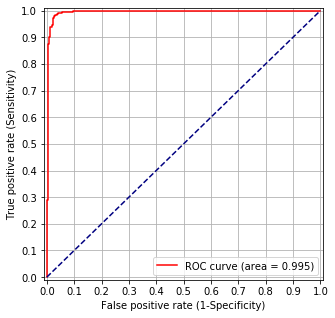

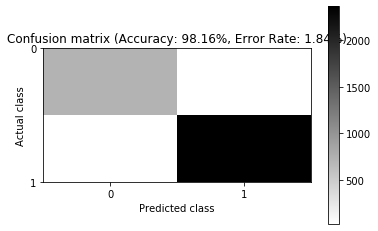

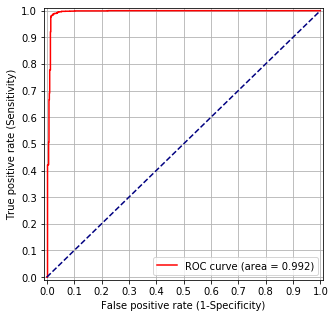

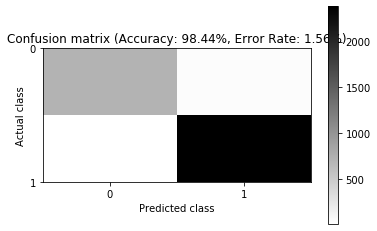

In [6]:
# K-fold crossvalidation
K = 2
"""Use StratifiedKFold method to ensure that training and test sets 
have roughly equal class proportions (stratification)"""

""" pd.value_counts(np.array(y_train).flatten())/len(y_train)== 
pd.value_counts(np.array(y_test).flatten())/len(y_test)"""

CV = StratifiedKFold(K)

k=1
for train_index, test_index in CV.split(X,y):

    # extract training and test set for current CV fold
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

    logit_classifier = LogisticRegression(solver="lbfgs", max_iter=1000)
    logit_classifier.fit(X_train, np.array(y_train).flatten())

    y_test_est = np.array(logit_classifier.predict(X_test)).flatten()
    ## Predicted probabilities for the label of 1     
    p = logit_classifier.predict_proba(X_test)[:,1]
    ## Predicted probabilities for the label of 0
    #1-p=ogit_classifier.predict_proba(X_test)[:,0]
    tpr=roc_curve(y_test,p)[0] # True Positive rate
    fpr=roc_curve(y_test,p)[1] # False Positive rate
    AUC=auc(tpr,fpr)    # Area under Curve
    
    plt.figure(figsize=(5,5))    
    plt.figure(k)
    ROC(tpr,fpr,AUC)  
    
    plt.figure(k+1)      
    plot_cm(y_test,y_test_est)
    
    k+=2
   


We want to examine how well the type of wine can be classified using only the `Alcohol` attribute.

In [7]:
X=df["Alcohol"]
X=X.values.reshape(-1,1)

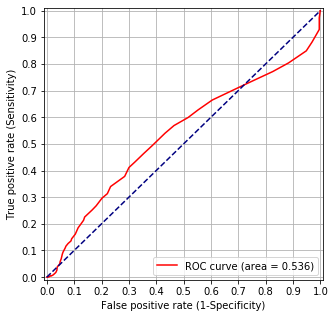

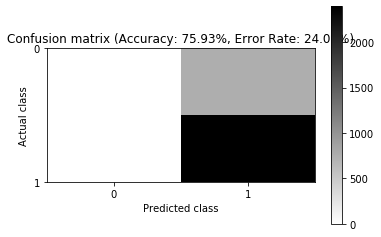

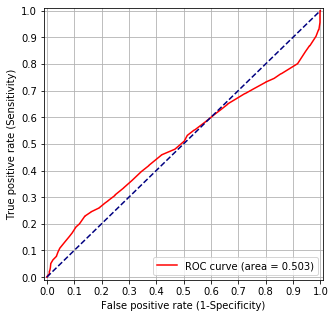

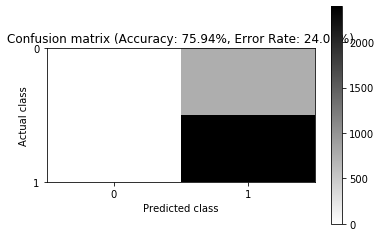

In [8]:

# K-fold crossvalidation
K = 2
CV = StratifiedKFold(K)

k=1
for train_index, test_index in CV.split(X,y):

    # extract training and test set for current CV fold
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

    logit_classifier = LogisticRegression(solver="lbfgs", max_iter=1000)
    logit_classifier.fit(X_train, np.array(y_train).flatten())

    y_test_est = np.array(logit_classifier.predict(X_test)).flatten()
    ## Predicted probabilities for the label of 1     
    p = logit_classifier.predict_proba(X_test)[:,1]
    ## Predicted probabilities for the label of 0
    #1-p=ogit_classifier.predict_proba(X_test)[:,0]
    tpr=roc_curve(y_test,p)[0] # True Positive rate
    fpr=roc_curve(y_test,p)[1] # False Positive rate
    AUC=auc(tpr,fpr)    # Area under Curve
    
    plt.figure(figsize=(5,5))    
    plt.figure(k)
    ROC(tpr,fpr,AUC)  
    
    plt.figure(k+1)      
    plot_cm(y_test,y_test_est)
    
    k+=2
   

### 9.2 Ensemble methods

In [9]:
# Load Matlab data file and extract variables of interest
mat_data = loadmat('synth5.mat')
X = np.matrix(mat_data['X'])
y = np.matrix(mat_data['y'], dtype=int)
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

df=pd.DataFrame(X).set_axis(attributeNames,axis=1,inplace=False)
df["y"]=y
df.head()

,x1,x2,y
0,0.020775,0.282897,0
1,0.216412,0.318091,0
2,0.172752,0.675529,1
3,0.773649,0.200813,0
4,0.692919,0.934092,1


In [10]:
# exercise 9.2.1
from sklearn.utils import resample
# data sample
L=100
def bootstrap_sampling(df,N):
    boot_df = resample(df, replace=True, n_samples=N)
    X_train=boot_df.drop("y",1)
    y_train=boot_df["y"]
    return (X_train,y_train)

In [11]:
N=X.shape[0]
ErrorRate=[]

treshold=0.5

for l in range(L):
    X_train,y_train=bootstrap_sampling(df,N)
    logit_classifier = LogisticRegression(solver="lbfgs", max_iter=1000)
    logit_classifier.fit(X_train, np.array(y_train).flatten())
    ## Predicted probabilities for the label of 1     
    P= logit_classifier.predict_proba(X)[:,1] 
    y_est=[]
    for p in P:
        if p>treshold:
            y_est.append(1)
        else:
            y_est.append(0)           
    #y_est = logit_classifier.predict(X)
    count=0
    for a,b in zip(y,y_est):
        if a!=b:
            count+=1
    print('Error rate: {:.1f}%'.format(count/len(y)*100))    
    ErrorRate.append(count/len(y))

Error rate: 17.4%
Error rate: 17.4%
Error rate: 17.0%
Error rate: 17.8%
Error rate: 17.2%
Error rate: 17.6%
Error rate: 18.0%
Error rate: 17.8%
Error rate: 17.8%
Error rate: 17.8%
Error rate: 18.0%
Error rate: 17.8%
Error rate: 17.6%
Error rate: 18.0%
Error rate: 17.2%
Error rate: 17.8%
Error rate: 17.6%
Error rate: 18.8%
Error rate: 18.2%
Error rate: 17.8%
Error rate: 17.4%
Error rate: 18.2%
Error rate: 17.2%
Error rate: 18.0%
Error rate: 17.6%
Error rate: 18.0%
Error rate: 17.2%
Error rate: 18.2%
Error rate: 17.4%
Error rate: 17.6%
Error rate: 17.2%
Error rate: 18.0%
Error rate: 17.6%
Error rate: 17.6%
Error rate: 17.4%
Error rate: 17.8%
Error rate: 17.2%
Error rate: 18.0%
Error rate: 17.6%
Error rate: 17.8%
Error rate: 17.0%
Error rate: 18.0%
Error rate: 17.4%
Error rate: 17.8%
Error rate: 18.0%
Error rate: 17.2%
Error rate: 17.6%
Error rate: 17.8%
Error rate: 18.2%
Error rate: 17.6%
Error rate: 17.4%
Error rate: 17.6%
Error rate: 17.6%
Error rate: 17.4%
Error rate: 17.6%
Error rate

In [12]:
# Load Matlab data file and extract variables of interest
mat_data = loadmat('synth6.mat')
X = np.matrix(mat_data['X'])
y = np.matrix(mat_data['y'], dtype=int)
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

df=pd.DataFrame(X).set_axis(attributeNames,axis=1,inplace=False)
df["y"]=y
df.head()

,x1,x2,y
0,0.70,0.10,1
1,0.30,0.45,1
2,0.35,0.60,1
3,0.60,0.65,1
4,0.50,0.20,1


### Application of Boostraping for prediction

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Load Matlab data file and extract variables of interest
mat_data = loadmat('synth5.mat')
X = np.matrix(mat_data['X'])
y = np.matrix(mat_data['y'], dtype=int)
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

df=pd.DataFrame(X).set_axis(attributeNames,axis=1,inplace=False)
df["y"]=y
df.head()

,x1,x2,y
0,0.020775,0.282897,0
1,0.216412,0.318091,0
2,0.172752,0.675529,1
3,0.773649,0.200813,0
4,0.692919,0.934092,1


In [15]:
XX_train, XX_test, yy_train, yy_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [16]:
L=1000
N=X.shape[0]
vote_list=[[] for _ in range(len(XX_test))]
print(len(vote_list))

for l in range(L):
    X_train,y_train=bootstrap_sampling(df,N)
    logit_classifier = LogisticRegression(solver="lbfgs", max_iter=1000)
    logit_classifier.fit(X_train, np.array(y_train).flatten())
    y_est = logit_classifier.predict(XX_test)
    for i in range(len(y_est)):
        vote_list[i].append(y_est[i])
y_est=[]
for x in range(len(vote_list)):
    if np.mean(vote_list[x])>0.5: y_est.append(1);
    else: y_est.append(0);   


50


### <font color='red'>How to calculate error...?</font> 

In [17]:
## Method 1:
count=0
for (a,b) in zip(np.array(y_est).reshape(-1,1),yy_test):
    if a!=b: count+=1;
print("Error rate=", count/len(yy_test))  

## Method 2:
Error=(np.array(y_est).reshape(-1,1)!=yy_test).sum(dtype=float)/len(yy_test)
print("Error rate=", Error) 

Error rate= 0.18
Error rate= 0.18


## Boostrap using function  

In [ ]:
# exercise 9.2.2

In [18]:
def bootstrap_sampling(df,N):
    boot_df = resample(df, replace=True, n_samples=N)
    X_train=boot_df.drop("y",1)
    y_train=boot_df["y"]
    return (X_train,y_train)

In [19]:
def bootstrap_sampling2(df,N,weights=None):
    if np.any(weights==None):
        weights=np.repeat(1/len(df),len(df))
    selected_indices = np.random.choice(range(len(df)), size=(N), replace=True,p=weights)
    boot_df=df.loc[selected_indices,:]
    X_train=boot_df.drop("y",1)
    y_train=boot_df["y"]
    return (X_train,y_train)   

In [22]:
L=100
N=df.shape[0]
weights=np.repeat(1/len(df),len(df))
Error_rate=[]
alpha=[]
y_all= np.zeros((N,L))

for l in range(L):
        # Extract training set by random sampling with replacement from X and y
    while True : 
        # not a thing of beauty, however log.reg. fails if presented with less than two classes. 
        X_train, y_train = bootstrap_sampling2(df,N,weights)
        if not (all(y_train==0) or all(y_train == 1)) : break   
    
    logit_classifier = LogisticRegression(solver="lbfgs", max_iter=1000)
    logit_classifier.fit(X_train, np.array(y_train).flatten())
    y_est = logit_classifier.predict(X)
    err=(y_est != np.array(y).flatten()).sum(dtype=float)/len(y_est)
    alphai = 0.5 * np.log( (1-err)/err)
    alpha.append(alphai)
    Error_rate.append(err)
    ind = np.where(y_est != np.array(y).flatten())[0]
    weights[ind] = weights[ind]*np.exp(-alphai) ## Increase weights of misclassified observations
    weights=weights / np.sum(weights)           ## Renormalize weights
    print('Error rate: {0}%'.format(err*100))   
    y_all[:,l]=y_est    

print("---------Estimated value of class labels (using 0.5 as threshold) by majority voting----------")
##print(y_all.shape)
##print(y.shape)
Av= np.mean(y_all,axis=1)
Av[Av<0.5]=0
Av[Av>=0.5]=1
ErrorRateEnsemble= (Av!=np.array(y).flatten()).sum(dtype=float)/len(Av)
print('Error rate for ensemble classifier: {:.1f}%'.format(ErrorRateEnsemble*100))

Error rate: 17.4%
Error rate: 18.0%
Error rate: 17.2%
Error rate: 17.8%
Error rate: 17.2%
Error rate: 17.8%
Error rate: 17.2%
Error rate: 17.4%
Error rate: 17.599999999999998%
Error rate: 17.599999999999998%
Error rate: 18.0%
Error rate: 18.2%
Error rate: 17.4%
Error rate: 17.599999999999998%
Error rate: 17.4%
Error rate: 17.8%
Error rate: 17.0%
Error rate: 17.4%
Error rate: 17.599999999999998%
Error rate: 17.4%
Error rate: 17.599999999999998%
Error rate: 17.599999999999998%
Error rate: 17.4%
Error rate: 17.599999999999998%
Error rate: 17.599999999999998%
Error rate: 17.4%
Error rate: 17.8%
Error rate: 16.8%
Error rate: 17.599999999999998%
Error rate: 17.2%
Error rate: 17.8%
Error rate: 18.0%
Error rate: 17.4%
Error rate: 17.4%
Error rate: 17.8%
Error rate: 18.0%
Error rate: 17.4%
Error rate: 17.2%
Error rate: 18.0%
Error rate: 17.599999999999998%
Error rate: 17.4%
Error rate: 17.599999999999998%
Error rate: 17.4%
Error rate: 17.4%
Error rate: 17.0%
Error rate: 17.599999999999998%
Erro

### Random forest: <font color='red'>Bagging applied to decision trees is often called `random forests`.</font>

In [73]:
# Load Matlab data file and extract variables of interest
mat_data = loadmat('synth7.mat')
X = np.matrix(mat_data['X'])
y = np.matrix(mat_data['y'], dtype=int)
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

df=pd.DataFrame(X).set_axis(attributeNames,axis=1,inplace=False)
df["y"]=y
df.head()

,x1,x2,y
0,0.923983,0.375663,1
1,0.286681,0.167146,1
2,0.575814,0.451366,0
3,0.660464,0.070620,1
4,0.150924,0.258054,1


In [74]:
from sklearn.ensemble import RandomForestClassifier
from toolbox_02450 import dbplot, dbprobplot

In [75]:
# Number of rounds of bagging
L = 100

# Fit model using random tree classifier:
rf_classifier = RandomForestClassifier(L)
rf_classifier.fit(X, np.array(y).flatten())
y_est = rf_classifier.predict(X)
y_est_prob = rf_classifier.predict_proba(X)

# Compute classification error
ErrorRate = (np.array(y).flatten()!=y_est).sum(dtype=float)/N
print('Error rate: {:.2f}%'.format(ErrorRate*100))  


Error rate: 0.00%


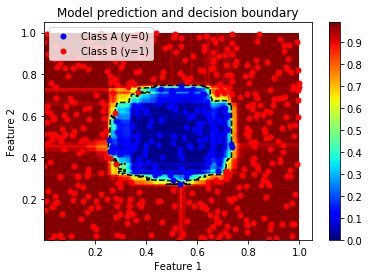

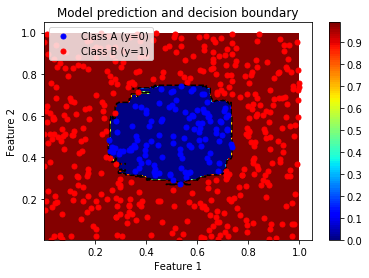

In [15]:
# Plot decision boundaries    
plt.figure(1); dbprobplot(rf_classifier, X, y, 'auto', resolution=400)
plt.figure(2); dbplot(rf_classifier, X, y, 'auto', resolution=400)
